# **Machine Learning with Python**

# EXPLORATORY DATA ANALYSIS

In [64]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.model_selection import train_test_split

**Reading the Data**

In [65]:
data = pd.read_csv("card_transdata.csv")

**Shape of the Data**

In [66]:
data.shape

(89871, 8)

**Displaying few rows of Dataframes**

In [67]:
data.head(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


**Data types of all columns**

In [68]:
data.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

**Statistics summary of the features**

In [69]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,89871.000000,89871.000000,89871.000000,89870.000000,89870.000000,89870.000000,89870.000000,89870.000000
mean,26.732533,5.028049,1.815422,0.882664,0.350818,0.102982,0.651252,0.086647
std,65.828397,24.490704,2.935974,0.321822,0.477229,0.303937,0.476577,0.281319
min,0.021322,0.000488,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.874074,0.295638,0.475441,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.974509,0.995175,0.994002,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.825991,3.333702,2.079725,1.000000,1.000000,0.000000,1.000000,0.000000
max,4601.011222,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.000000


**Checking missing values for each feature**

In [70]:
data.isna().any()

distance_from_home                False
distance_from_last_transaction    False
ratio_to_median_purchase_price    False
repeat_retailer                    True
used_chip                          True
used_pin_number                    True
online_order                       True
fraud                              True
dtype: bool

In [71]:
data.fillna(method='ffill', inplace=True)
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Distribution of target variable**

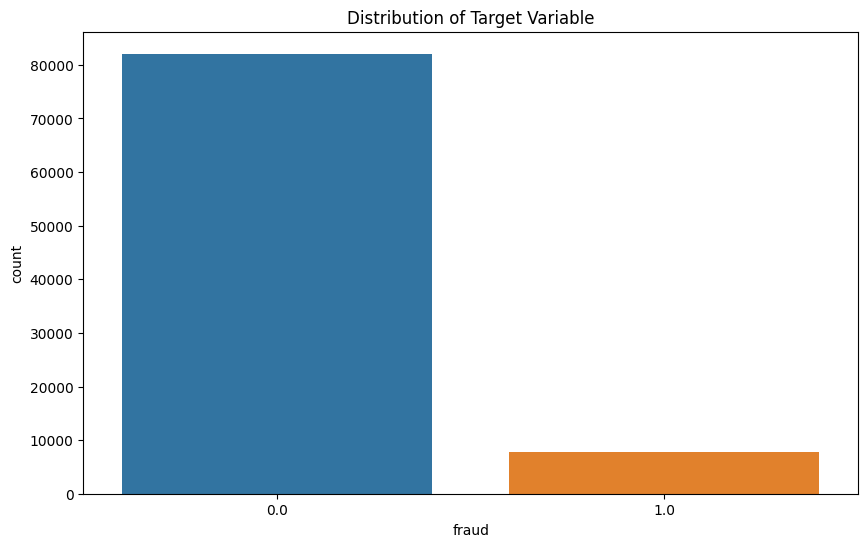

In [72]:
plt.figure(figsize=(10,6))
sns.countplot(x='fraud',data=data).set_title('Distribution of Target Variable')
plt.show()

**Distribution of All Features**

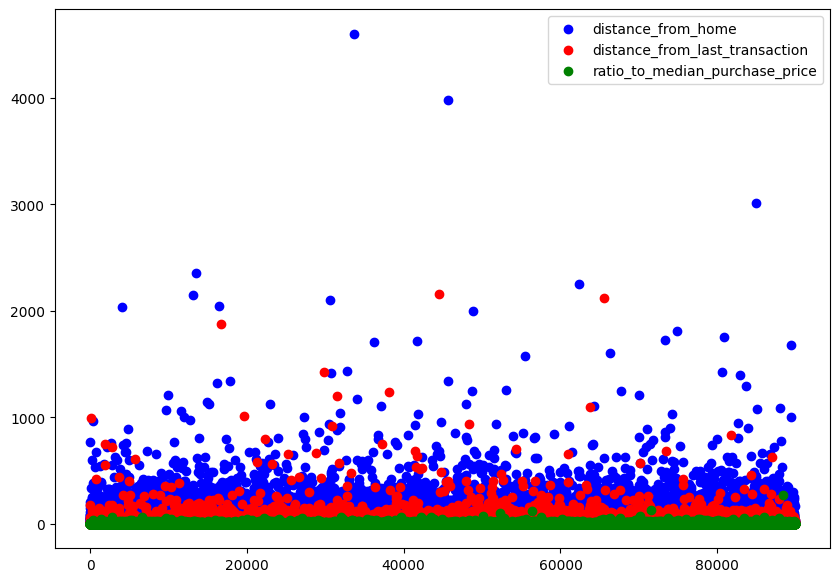

In [73]:
plt.figure(figsize=(10,7))
plt.scatter(x=data.index,y=data.distance_from_home,label='distance_from_home',color='blue')
plt.scatter(x=data.index,y=data.distance_from_last_transaction,label='distance_from_last_transaction',color='red')
plt.scatter(x=data.index,y=data.ratio_to_median_purchase_price,label='ratio_to_median_purchase_price',color='green')
plt.legend()
plt.show()


In [74]:
feature = ['repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order']

In [75]:
list(enumerate(feature))

[(0, 'repeat_retailer'),
 (1, 'used_chip'),
 (2, 'used_pin_number'),
 (3, 'online_order')]

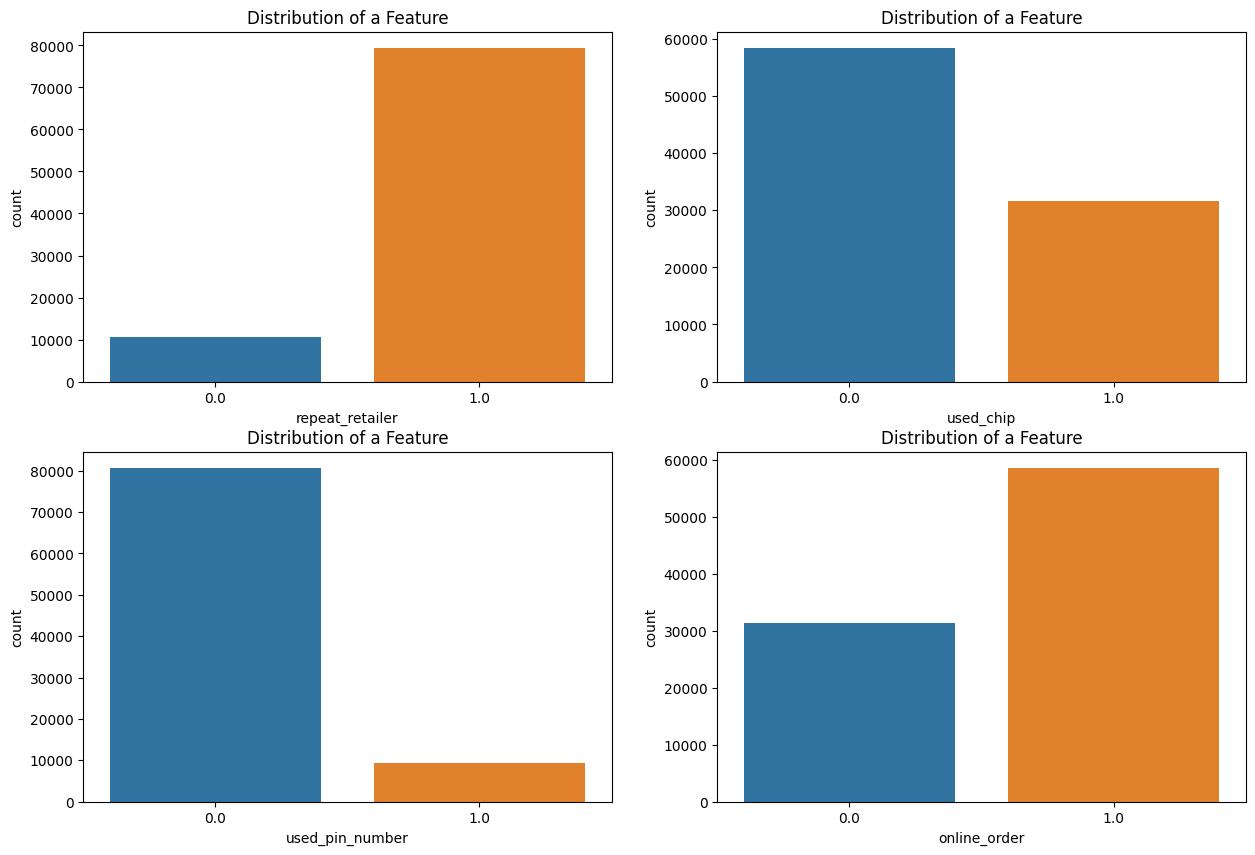

In [76]:
plt.figure(figsize=(15,10))
for i in enumerate(feature):
  plt.subplot(2,2,i[0]+1)
  sns.countplot(x=i[1],data=data).set_title("Distribution of a Feature")
plt.show()


**Boxplots**

In [77]:
feature1=['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']

In [78]:
list(enumerate(feature1))

[(0, 'distance_from_home'),
 (1, 'distance_from_last_transaction'),
 (2, 'ratio_to_median_purchase_price')]

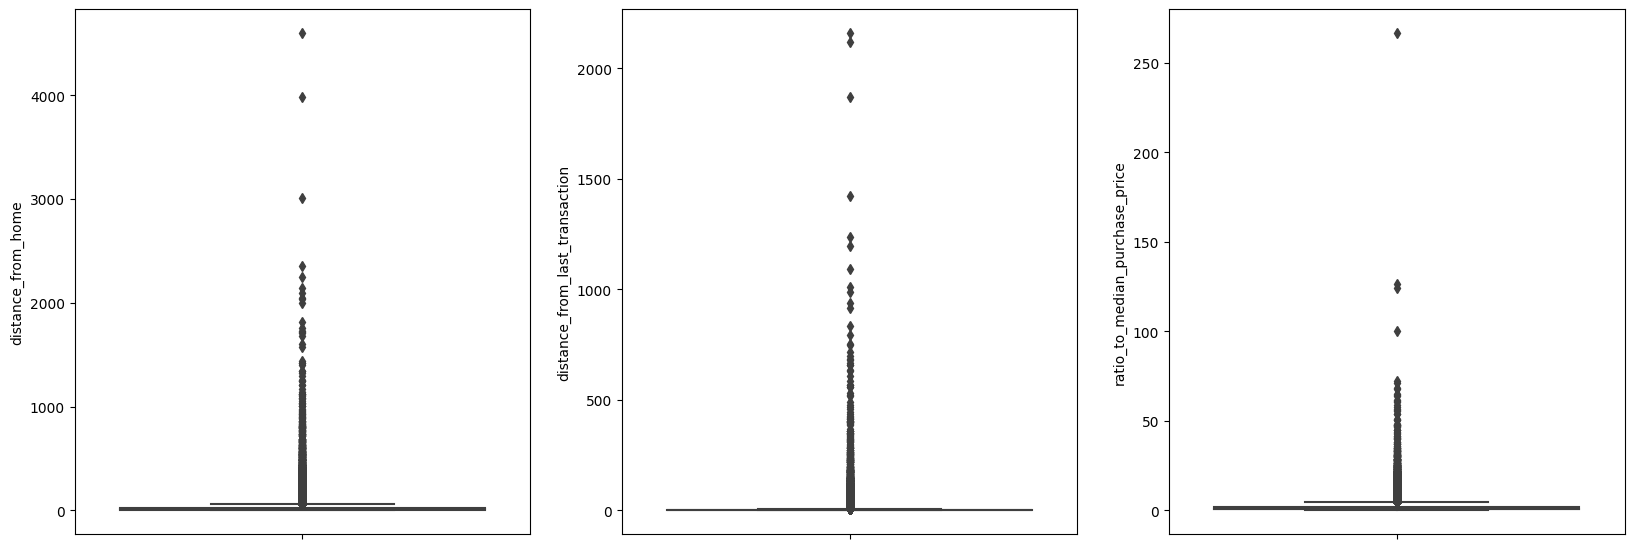

In [79]:
plt.figure(figsize=(20,15))
for i in enumerate(feature1):
  plt.subplot(2,3,i[0]+1)
  sns.boxplot(y=i[1],data=data)


**Outliers**

In [80]:
def outliers(data_r,ft):
  Q1 = data_r[ft].quantile(0.25)
  Q3 = data_r[ft].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  Data_outliers=data.index[(data_r[ft] < lower_limit)|(data_r[ft] > upper_limit)]
  return Data_outliers.shape

In [81]:
outliers(data,"distance_from_home")

(9252,)

In [82]:
outliers(data,"distance_from_last_transaction")

(11183,)

In [83]:
outliers(data,"ratio_to_median_purchase_price")

(7600,)

In [84]:
outliers_index = []
for i in ['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']:
  outliers_index.extend(outliers(data,i))
outliers_index

[9252, 11183, 7600]

**Removing Outliers**

In [85]:
def remove(data_c,Data_outliers):
  Data_outliers = sorted(set(Data_outliers))
  data_c = data.drop(Data_outliers)
  return data_c

In [86]:
data_cleaned = remove(data,outliers_index)

In [87]:
data_cleaned.shape

(89868, 8)

**Correlation Heatmaps**

In [88]:
corr=data_cleaned.corr()

Text(0.5, 1.0, 'Heatmap')

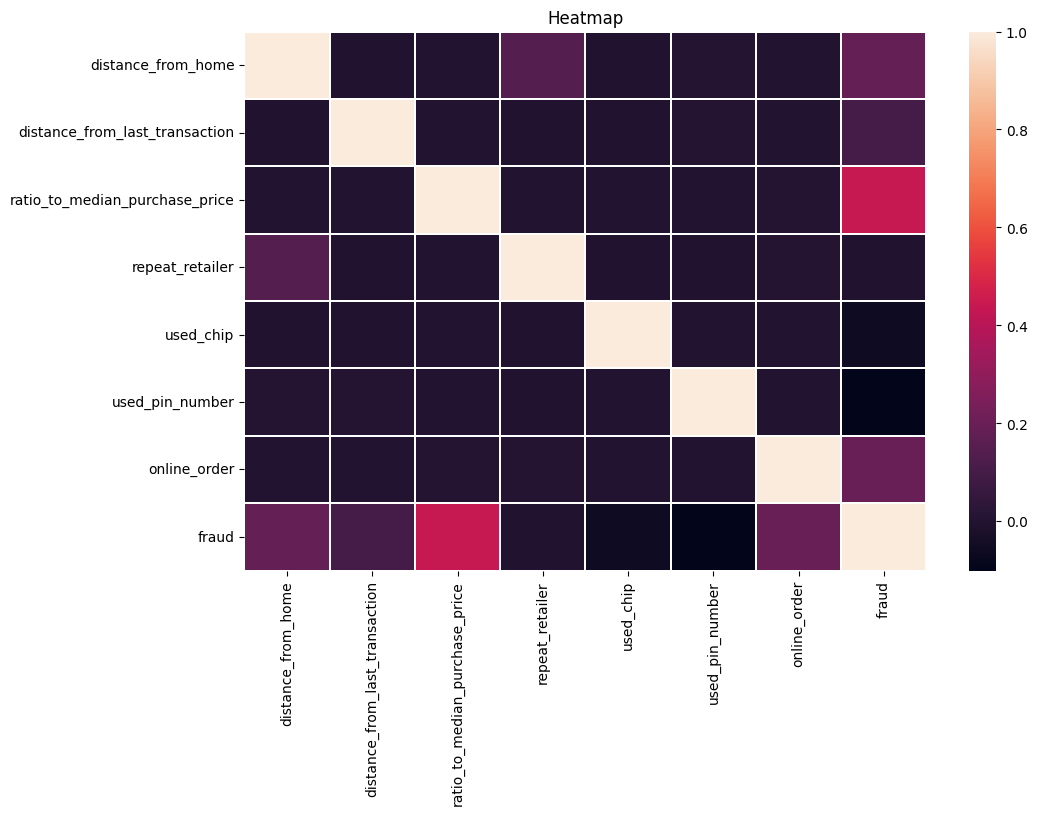

In [89]:
plt.figure(figsize=(11,7))
sns.heatmap(corr,linewidths=.1).set_title('Heatmap')

Text(0.5, 1.0, 'Heat Map')

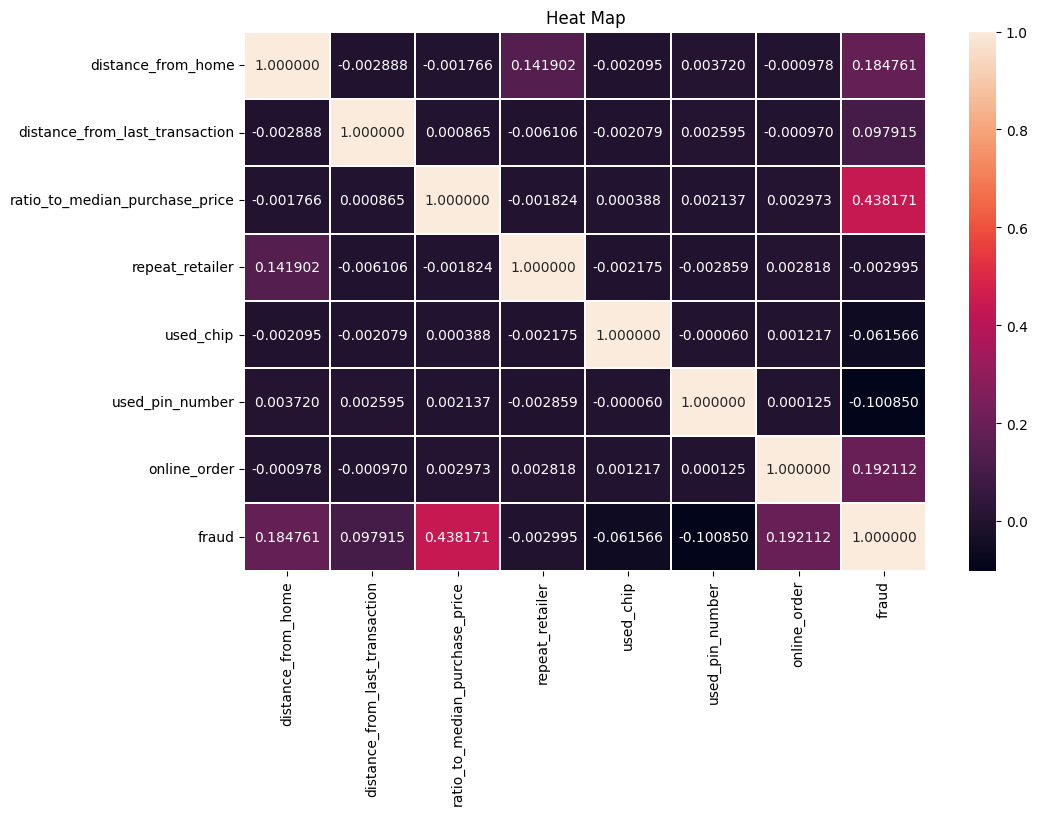

In [90]:
plt.figure(figsize=(11,7))
sns.heatmap(corr,annot=True, fmt="f",linewidths=.1).set_title('Heat Map')

# **Data Preprocessing**

**Displaying info**

In [91]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89868 entries, 0 to 89870
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              89868 non-null  float64
 1   distance_from_last_transaction  89868 non-null  float64
 2   ratio_to_median_purchase_price  89868 non-null  float64
 3   repeat_retailer                 89868 non-null  float64
 4   used_chip                       89868 non-null  float64
 5   used_pin_number                 89868 non-null  float64
 6   online_order                    89868 non-null  float64
 7   fraud                           89868 non-null  float64
dtypes: float64(8)
memory usage: 6.2 MB


**Dropping the unwanted columns**

In [92]:
data_cleaned = data_cleaned.drop('distance_from_home',axis = 1)

In [93]:
data_cleaned.head(5)

,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Dropping Rows with missing Values**

In [94]:
data_cleaned = data_cleaned.dropna()


# **Spliting the data into train and test**

In [95]:
x = data_cleaned.values
y = data_cleaned['fraud'].values

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.3,random_state=0)

In [97]:
from sklearn.linear_model import LinearRegression
createmodel=LinearRegression()
createmodel.fit(x_train,y_train)

LinearRegression()

In [98]:
y_predict=createmodel.predict(x_test)
y_predict

array([ 1.48303923e-16,  1.68217243e-17, -2.85519701e-16, ...,
        1.60380910e-17,  5.63676347e-16, -2.87105024e-16])

**Accuracy**

In [99]:
accuracy=createmodel.score(x,y)
accuracy

1.0

In [100]:
X1 = sm.add_constant(x)
result = sm.OLS(y, X1).fit()
print (result.rsquared, result.rsquared_adj)

1.0 1.0
